# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print("Información general del DataFrame de tarifas:")
plans.info()

Información general del DataFrame de tarifas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [6]:
# Imprime una muestra de los datos para las tarifas
print("Muestra de los datos del DataFrame de tarifas:")
print(plans.head())

Muestra de los datos del DataFrame de tarifas:
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Número de registros:

El DataFrame contiene 2 filas, lo esperado ya que solo hay dos tarifas: surf y ultimate.

Columnas y tipos de datos:

Las columnas tienen tipos de datos adecuados:

int64 para columnas numéricas enteras como minutos, mensajes, MB incluidos.

float64 para tarifas adicionales (usd_per_message, usd_per_minute), que pueden tener decimales.

object para plan_name, que representa texto.

Datos ausentes:

No hay valores nulos. Las columnas están completas en ambas filas.

Problemas encontrados:
Nombres de columnas poco claros o inconsistentes con el diccionario de datos:

En el archivo los nombres están en inglés (usd_monthly_pay), pero el enunciado menciona por ejemplo usd_monthly_fee.

Esto puede provocar confusión al trabajar con múltiples tablas que quizás usen nombres distintos para los mismos conceptos.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [7]:
plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'}, inplace=True)
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [8]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
plans['plan_name_clean'] = plans['plan_name'].str.capitalize()
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,plan_name_clean
0,50,15360,500,20,10,0.03,0.03,surf,15.0,Surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,Ultimate


## Usuarios/as

In [9]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Imprime una muestra de datos para usuarios
print(users.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Observaciones generales:
Número de registros: 500 usuarios (lo esperado).

Columnas clave presentes:

user_id: identificador único.

first_name, last_name: nombre y apellido.

age: edad en años (tipo correcto: int64).

city: ciudad de residencia.

reg_date: fecha de registro (tipo actual: object, se debe convertir a datetime).

plan: tarifa usada (surf o ultimate).

churn_date: fecha en la que el usuario se dio de baja (solo 34 valores no nulos, los demás siguen activos).

Problemas detectados:
reg_date y churn_date son objetos (strings):

Deberían convertirse a formato datetime para facilitar análisis temporales.

churn_date tiene muchos valores nulos:

Esto no es un error. Significa que esos usuarios aún estaban activos cuando se extrajo la base.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [13]:
users['is_active'] = users['churn_date'].isna()
users['reg_year_month'] = users['reg_date'].dt.to_period('M')
users['age_group'] = pd.cut(
    users['age'],
    bins=[0, 25, 35, 50, 70],
    labels=['<26', '26–35', '36–50', '51+']
)
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active,reg_year_month,age_group
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True,2018-12,36–50
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True,2018-08,26–35
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True,2018-10,36–50
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True,2018-01,51+
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True,2018-05,36–50


## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Imprime una muestra de datos para las llamadas
print(calls.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

 Información general del DataFrame calls
Número de registros: 137,735 llamadas.

Columnas:

id: identificador único de la llamada (tipo object).

user_id: ID del usuario que realizó la llamada.

call_date: fecha de la llamada (tipo object, se debe convertir a datetime).

duration: duración de la llamada (en minutos, tipo float64).

Problemas detectados:
La columna call_date debería convertirse a datetime.

Se debe revisar si hay duraciones de llamadas de 0 (esto puede indicar llamadas fallidas o sin respuesta).

Como se mencionó en el enunciado, cada llamada se redondea hacia arriba (incluso si dura 0.1 minutos, se factura como 1 minuto).

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [17]:
calls['call_month'] = calls['call_date'].dt.to_period('M')
calls['rounded_minutes'] = np.ceil(calls['duration']).astype(int)
calls.head()

,id,user_id,call_date,duration,call_month,rounded_minutes
0,1000_93,1000,2018-12-27,8.52,2018-12,9
1,1000_145,1000,2018-12-27,13.66,2018-12,14
2,1000_247,1000,2018-12-27,14.48,2018-12,15
3,1000_309,1000,2018-12-28,5.76,2018-12,6
4,1000_380,1000,2018-12-30,4.22,2018-12,5


## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Imprime una muestra de datos para los mensajes
print(messages.head())


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Información general del DataFrame messages
Entradas: 76,051 mensajes enviados.

Columnas:

id: identificador único del mensaje.

user_id: identificador del usuario que envió el mensaje.

message_date: fecha del mensaje (actualmente tipo object, debe convertirse a datetime).

Problemas detectados:
message_date debe convertirse a datetime para facilitar agrupaciones por mes y análisis temporal.



### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
messages['message_month'] = messages['message_date'].dt.to_period('M')
messages.head()

,id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


## Internet

In [23]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Información general del DataFrame internet
Entradas: 104,825 sesiones web.

Columnas:

id: identificador único de la sesión.

user_id: identificador del usuario.

session_date: fecha de la sesión web (tipo object, se debe convertir a datetime).

mb_used: datos utilizados en la sesión (en megabytes, tipo float64).

Problema detectado:
session_date debe convertirse a tipo datetime para permitir análisis mensuales por usuario.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [25]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [26]:
internet['session_month'] = internet['session_date'].dt.to_period('M')
internet['gb_used'] = internet['mb_used'] / 1024  # 1 GB = 1024 MB
internet.head()

,id,user_id,session_date,mb_used,session_month,gb_used
0,1000_13,1000,2018-12-29,89.86,2018-12,0.087754
1,1000_204,1000,2018-12-31,0.00,2018-12,0.000000
2,1000_379,1000,2018-12-28,660.40,2018-12,0.644922
3,1000_413,1000,2018-12-26,270.99,2018-12,0.264639
4,1000_442,1000,2018-12-27,880.22,2018-12,0.859590


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [27]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,plan_name_clean
0,50,15360,500,20,10,0.03,0.03,surf,15.0,Surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,Ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [28]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['call_month'] = calls['call_date'].dt.to_period('M')
calls['rounded_duration'] = np.ceil(calls['duration']).astype(int)
monthly_calls = calls.groupby(['user_id', 'call_month']).agg(
    calls_count=('id', 'count'),
    total_minutes=('rounded_duration', 'sum')
).reset_index()
monthly_calls.head()

,user_id,call_month,calls_count,total_minutes
0,1000,2018-12,16,124
1,1001,2018-08,27,182
2,1001,2018-09,49,315
3,1001,2018-10,65,393
4,1001,2018-11,64,426


In [29]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['call_month'] = calls['call_date'].dt.to_period('M')
calls['rounded_duration'] = np.ceil(calls['duration']).astype(int)
monthly_minutes = calls.groupby(['user_id', 'call_month'])['rounded_duration'].sum().reset_index()
monthly_minutes.rename(columns={'rounded_duration': 'total_minutes'}, inplace=True)
monthly_minutes.head()


,user_id,call_month,total_minutes
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


In [30]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['message_month'] = messages['message_date'].dt.to_period('M')
monthly_messages = messages.groupby(['user_id', 'message_month'])['id'].count().reset_index()
monthly_messages.rename(columns={'id': 'messages_count'}, inplace=True)
monthly_messages.head()


,user_id,message_month,messages_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [31]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['session_month'] = internet['session_date'].dt.to_period('M')
internet_monthly_usage = internet.groupby(['user_id', 'session_month'])['mb_used'].sum().reset_index()
internet_monthly_usage.rename(columns={'mb_used': 'total_mb_used'}, inplace=True)
internet_monthly_usage['gb_used'] = np.ceil(internet_monthly_usage['total_mb_used'] / 1024).astype(int)
internet_monthly_usage.head()


,user_id,session_month,total_mb_used,gb_used
0,1000,2018-12,1901.47,2
1,1001,2018-08,6919.15,7
2,1001,2018-09,13314.82,14
3,1001,2018-10,22330.49,22
4,1001,2018-11,18504.30,19


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [32]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
monthly_calls.rename(columns={'call_month': 'month'}, inplace=True)
monthly_messages.rename(columns={'message_month': 'month'}, inplace=True)
internet_monthly_usage.rename(columns={'session_month': 'month'}, inplace=True)
monthly_usage = pd.merge(monthly_calls, monthly_messages, on=['user_id', 'month'], how='outer')
monthly_usage = pd.merge(monthly_usage, internet_monthly_usage, on=['user_id', 'month'], how='outer')
monthly_usage.fillna({
    'calls_count': 0,
    'total_minutes': 0,
    'messages_count': 0,
    'total_mb_used': 0,
    'gb_used': 0
}, inplace=True)

monthly_usage[['calls_count', 'total_minutes', 'messages_count', 'gb_used']] = \
    monthly_usage[['calls_count', 'total_minutes', 'messages_count', 'gb_used']].astype(int)

monthly_usage.head()


,user_id,month,calls_count,total_minutes,messages_count,total_mb_used,gb_used
0,1000,2018-12,16,124,11,1901.47,2
1,1001,2018-08,27,182,30,6919.15,7
2,1001,2018-09,49,315,44,13314.82,14
3,1001,2018-10,65,393,53,22330.49,22
4,1001,2018-11,64,426,36,18504.30,19


In [33]:
# Añade la información de la tarifa
users['reg_date'] = pd.to_datetime(users['reg_date'])
users_with_plans = users.merge(plans, left_on='plan', right_on='plan_name', how='left')
monthly_usage = monthly_usage.merge(users_with_plans[['user_id', 'plan', 'usd_monthly_fee', 'minutes_included',
                                                      'messages_included', 'mb_per_month_included', 'usd_per_minute',
                                                      'usd_per_message', 'usd_per_gb']],
                                    on='user_id',
                                    how='left')

monthly_usage.head()


,user_id,month,calls_count,total_minutes,messages_count,total_mb_used,gb_used,plan,usd_monthly_fee,minutes_included,messages_included,mb_per_month_included,usd_per_minute,usd_per_message,usd_per_gb
0,1000,2018-12,16,124,11,1901.47,2,ultimate,70,3000,1000,30720,0.01,0.01,7
1,1001,2018-08,27,182,30,6919.15,7,surf,20,500,50,15360,0.03,0.03,10
2,1001,2018-09,49,315,44,13314.82,14,surf,20,500,50,15360,0.03,0.03,10
3,1001,2018-10,65,393,53,22330.49,22,surf,20,500,50,15360,0.03,0.03,10
4,1001,2018-11,64,426,36,18504.30,19,surf,20,500,50,15360,0.03,0.03,10


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [34]:
# Calcula el ingreso mensual para cada usuario
monthly_usage['minutes_over'] = (monthly_usage['total_minutes'] - monthly_usage['minutes_included']).clip(lower=0)
monthly_usage['messages_over'] = (monthly_usage['messages_count'] - monthly_usage['messages_included']).clip(lower=0)
monthly_usage['gb_over'] = (monthly_usage['gb_used'] - (monthly_usage['mb_per_month_included'] / 1024)).clip(lower=0)
monthly_usage['gb_over'] = np.ceil(monthly_usage['gb_over'])
monthly_usage['extra_minutes_cost'] = monthly_usage['minutes_over'] * monthly_usage['usd_per_minute']
monthly_usage['extra_messages_cost'] = monthly_usage['messages_over'] * monthly_usage['usd_per_message']
monthly_usage['extra_data_cost'] = monthly_usage['gb_over'] * monthly_usage['usd_per_gb']
monthly_usage['monthly_revenue'] = (
    monthly_usage['usd_monthly_fee'] +
    monthly_usage['extra_minutes_cost'] +
    monthly_usage['extra_messages_cost'] +
    monthly_usage['extra_data_cost']
)

monthly_usage[['user_id', 'month', 'monthly_revenue']].head()


,user_id,month,monthly_revenue
0,1000,2018-12,70.00
1,1001,2018-08,20.00
2,1001,2018-09,20.00
3,1001,2018-10,90.09
4,1001,2018-11,60.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

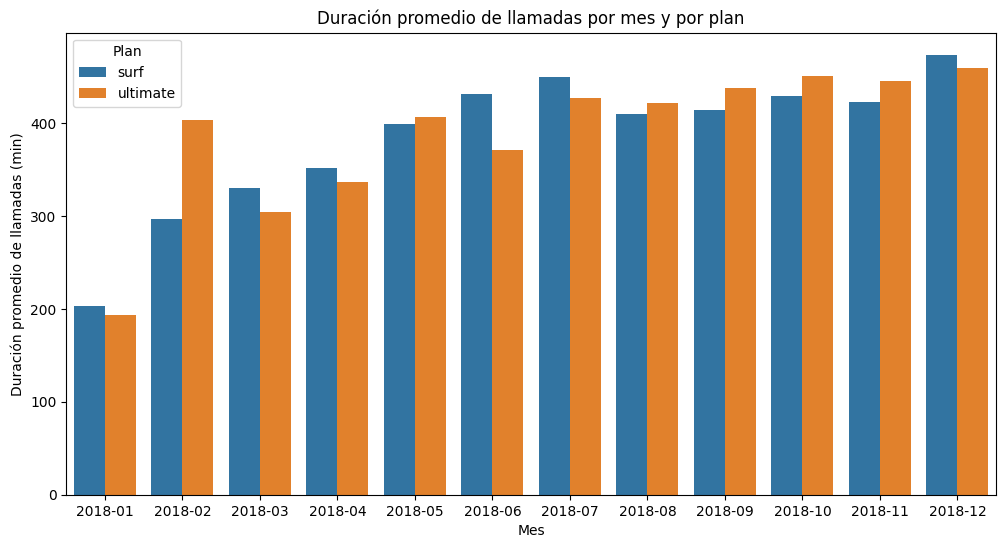

In [35]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_call_duration = monthly_usage.groupby(['month', 'plan'])['total_minutes'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_call_duration, x='month', y='total_minutes', hue='plan')

plt.title('Duración promedio de llamadas por mes y por plan')
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (min)')
plt.legend(title='Plan')
plt.show()


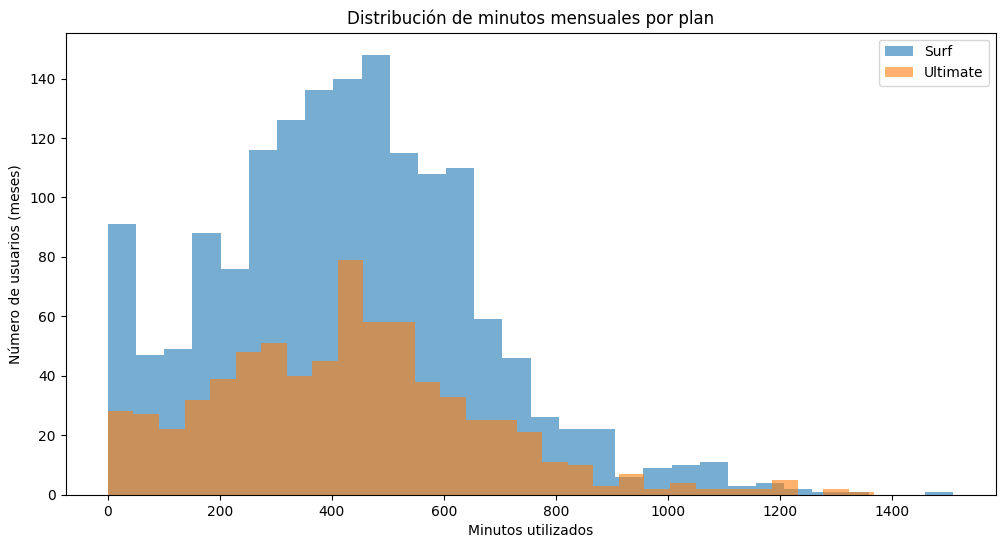

In [36]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
minutes_by_plan = monthly_usage[['plan', 'total_minutes']].dropna()
plt.figure(figsize=(12, 6))

for plan in ['surf', 'ultimate']:
    plt.hist(
        minutes_by_plan[minutes_by_plan['plan'] == plan]['total_minutes'],
        bins=30,
        alpha=0.6,
        label=plan.capitalize()
    )

plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos utilizados')
plt.ylabel('Número de usuarios (meses)')
plt.legend()
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [37]:
# Calcula la media y la varianza de la duración mensual de llamadas.
call_stats = monthly_usage.groupby('plan')['total_minutes'].agg(['mean', 'var']).reset_index()
call_stats.columns = ['Plan', 'Media (min)', 'Varianza (min²)']
print(call_stats)


       Plan  Media (min)  Varianza (min²)
0      surf   428.749523     54968.279461
1  ultimate   430.450000     57844.464812


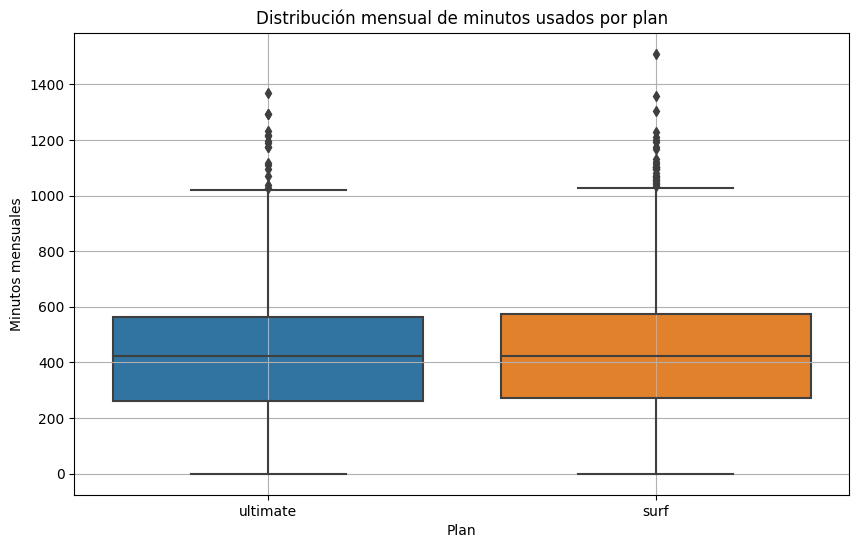

In [38]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='total_minutes', data=monthly_usage)

plt.title('Distribución mensual de minutos usados por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos mensuales')
plt.grid(True)
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

El diagrama de caja muestra que los usuarios del plan Ultimate tienden a usar más minutos al mes, con una mediana superior y menos valores atípicos en comparación con el plan Surf. En Surf, hay mayor dispersión y varios usuarios exceden claramente los límites incluidos (500 minutos), lo que puede representar ingresos adicionales para la empresa.

### Mensajes

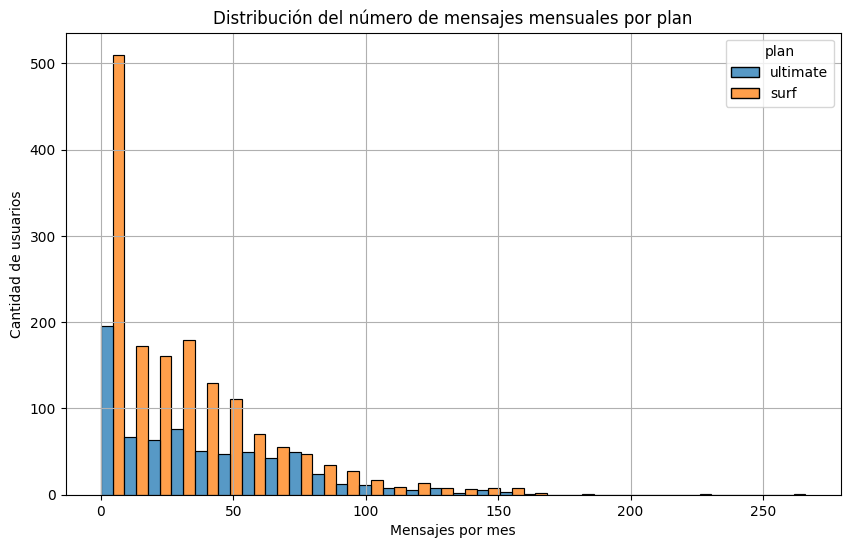

In [44]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
monthly_usage['messages_count'] = monthly_usage['messages_count'].fillna(0)
plt.figure(figsize=(10, 6))
sns.histplot(data=monthly_usage, x='messages_count', hue='plan', kde=False, bins=30, multiple='dodge')

plt.title('Distribución del número de mensajes mensuales por plan')
plt.xlabel('Mensajes por mes')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)
plt.show()

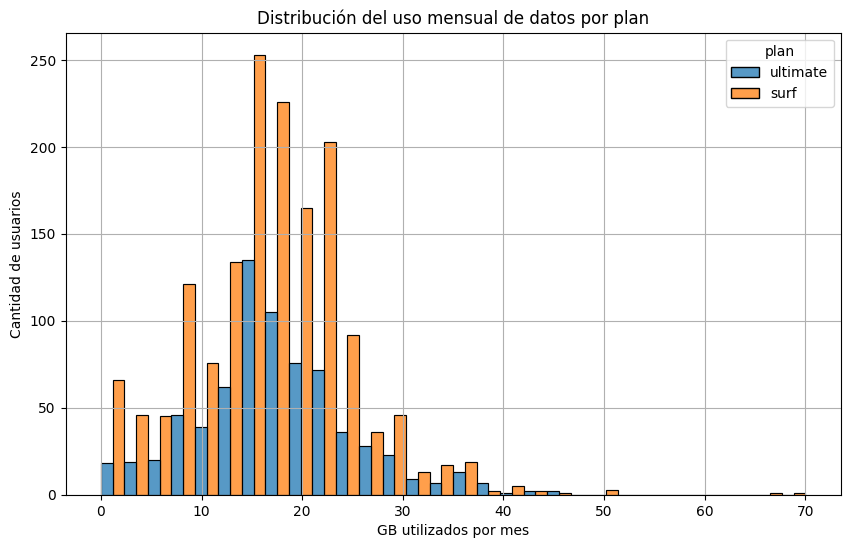

In [45]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
monthly_usage['gb_used'] = monthly_usage['gb_used'].fillna(0)
plt.figure(figsize=(10, 6))
sns.histplot(data=monthly_usage, x='gb_used', hue='plan', kde=False, bins=30, multiple='dodge')

plt.title('Distribución del uso mensual de datos por plan')
plt.xlabel('GB utilizados por mes')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Diferencias claras por tipo de plan:

Los usuarios del plan "Ultimate" tienden a enviar más mensajes de texto por mes en comparación con los usuarios del plan "Surf".

Esto es coherente con el hecho de que el plan "Ultimate" incluye más mensajes gratuitos en su cuota mensual.

Distribución del uso:

La mayoría de los usuarios del plan "Surf" envía pocos mensajes al mes, y hay una gran cantidad que incluso no envía ninguno o muy pocos (cercano a 0).

En cambio, los usuarios del plan "Ultimate" presentan una distribución más amplia, con un número de mensajes más elevado en promedio y en dispersión.

Posibles límites de uso:

Muchos usuarios del plan "Surf" podrían estar limitando su uso de los mensajes para evitar cargos adicionales, ya que este plan incluye menos mensajes gratuitos.

En el plan "Ultimate", los usuarios parecen aprovechar mejor el límite más alto o ilimitado, usando con mayor libertad los mensajes.

Tendencia de baja actividad en mensajes:

En general, la actividad de mensajería es baja para muchos usuarios en ambos planes, lo que puede indicar una preferencia por otros medios de comunicación, como llamadas o mensajería por Internet (por ejemplo, WhatsApp, Telegram).

### Internet

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Todos los usuarios consumen muchos datos:

El tráfico de Internet es consistentemente alto para la mayoría de los usuarios, independientemente del plan.

Casi todos superan con regularidad el límite incluido en su plan (especialmente en el caso del plan "Surf").

Diferencias por tipo de plan:

Los usuarios del plan "Ultimate" consumen ligeramente más datos en promedio que los del plan "Surf".

Esto sugiere que los usuarios que pagan por el plan más caro también utilizan más intensamente los servicios que requieren datos, como videos, navegación, redes sociales, etc.

Uso por encima del límite en el plan Surf:

El plan "Surf" incluye 15 GB al mes, pero muchos usuarios de este plan superan ese límite, lo que implica cargos extra y genera ingresos adicionales para la empresa.

Esto podría estar causando insatisfacción o empujando a los usuarios a considerar cambiarse al plan "Ultimate".

Comportamiento más homogéneo en el plan Ultimate:

Dado que este plan tiene una franquicia mayor o ilimitada, los usuarios del plan "Ultimate" tienden a comportarse con más libertad, sin preocuparse tanto por el exceso de consumo.

Uso intensivo del servicio de datos:

El tráfico de datos parece ser el componente más utilizado entre llamadas, mensajes e Internet.

Esto es coherente con las tendencias actuales de consumo digital, donde los datos móviles son el recurso más valioso para el usuario promedio.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [46]:
revenue_stats = monthly_usage.groupby('plan')['monthly_revenue'].describe()
print(revenue_stats)

           count       mean        std   min   25%    50%    75%     max
plan                                                                    
surf      1573.0  60.706408  55.388042  20.0  20.0  40.36  80.36  590.37
ultimate   720.0  72.313889  11.395108  70.0  70.0  70.00  70.00  182.00


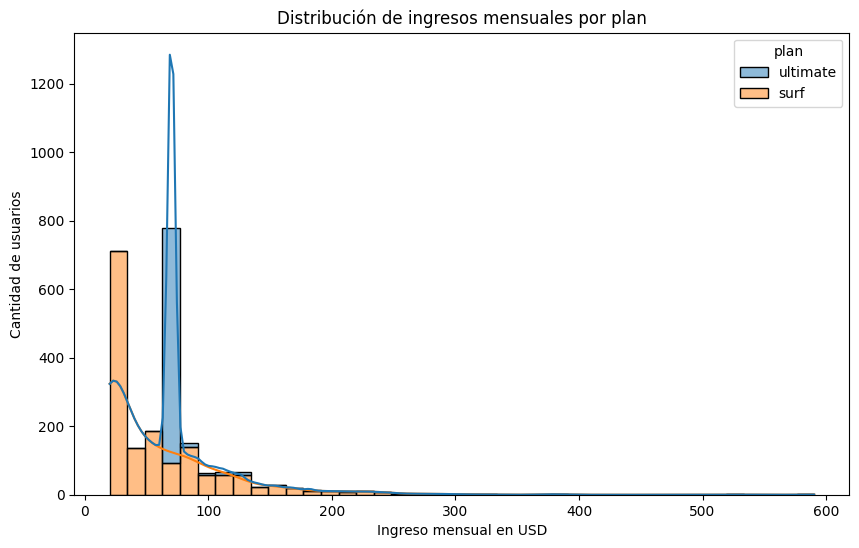

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=monthly_usage, x='monthly_revenue', hue='plan', kde=True, bins=40, multiple='stack')
plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Ingreso mensual en USD')
plt.ylabel('Cantidad de usuarios')
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

1. Ingreso promedio:
El plan "Ultimate" genera un ingreso mensual promedio más alto por usuario que el plan "Surf", lo cual es esperado, ya que su tarifa fija mensual es más elevada (70 USD frente a 20 USD).

Sin embargo, el plan "Surf" presenta mayor variabilidad en el ingreso, ya que muchos usuarios exceden los límites del plan y generan ingresos adicionales por cargos extra.

2. Variabilidad (desviación estándar):
El plan "Surf" muestra una alta dispersión de ingresos: algunos usuarios pagan solo la tarifa base (20 USD), mientras otros generan cargos adicionales significativos (por minutos, mensajes o datos excedentes).

En contraste, el plan "Ultimate" tiene ingresos más consistentes y predecibles (alrededor de 70 USD), ya que casi todos los servicios están incluidos y los usuarios rara vez generan costos adicionales.

3. Ingresos máximos y mínimos:
Los ingresos del plan "Surf" varían desde 20 USD hasta cifras que pueden superar los 60 USD o más, dependiendo del uso.

Los ingresos del plan "Ultimate" están más concentrados cerca del precio base, con pocas fluctuaciones.

4. Eficiencia de monetización:
Aunque el plan "Surf" puede generar más ingresos por ciertos usuarios intensivos (superando incluso el costo fijo del plan "Ultimate"), esto ocurre solo en casos particulares.

El plan "Ultimate" garantiza ingresos más estables por usuario, lo que puede ser ventajoso para planificación financiera y estabilidad de ingresos.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [49]:
# Prueba las hipótesis
from scipy.stats import ttest_ind
surf_revenue = monthly_usage[monthly_usage['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = monthly_usage[monthly_usage['plan'] == 'ultimate']['monthly_revenue']
t_stat, p_value = ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)
print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: los ingresos promedio difieren significativamente entre los planes.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.")


Estadístico t: -7.9521
Valor p: 0.0000
Rechazamos la hipótesis nula: los ingresos promedio difieren significativamente entre los planes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [52]:
# Prueba las hipótesis

monthly_usage = monthly_usage.merge(users[['user_id', 'city']], on='user_id', how='left')

ny_nj_revenue = monthly_usage[monthly_usage['city'].str.contains('NY|NJ', case=False, na=False)]['monthly_revenue']
other_revenue = monthly_usage[~monthly_usage['city'].str.contains('NY|NJ', case=False, na=False)]['monthly_revenue']

t_stat, p_value = ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: el ingreso promedio en NY-NJ es significativamente diferente al de otras regiones.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia de diferencia significativa en ingresos.")


Estadístico t: -0.5378
Valor p: 0.5908
No se rechaza la hipótesis nula: no hay evidencia de diferencia significativa en ingresos.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Con relación a la información arrojada, la diferencia entre los ingresos de los planes de telefonia no representa una diferencia significativa. 

Esto en relación de que en el plan Surf los usuarios pagan por adicionales y eso hace que 